<a href="https://colab.research.google.com/github/sarveesh/mastersProject/blob/develop/customCfgVocTee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/giuliogamba/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5497, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 5497 (delta 28), reused 22 (delta 22), pack-reused 5468
Receiving objects: 100% (5497/5497), 4.63 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (3657/3657), done.


In [2]:
%ls

darknet/  sample_data/


In [3]:
%cd /content/darknet/

/content/darknet


In [4]:
!make

mkdir -p obj
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./examples/detector.c -o obj/detector.o
./examples/detector.c: In function ‘draw_detection_python’:
./examples/detector.c:644:21: warning: implicit declaration of function ‘load_alphabet_path’; did you mean ‘load_alphabet’? [-Wimplicit-function-declaration]
  image **alphabet = load_alphabet_path(path_darknet);
                     ^~~~~~~~~~~~~~~~~~
                     load_alphabet
./examples/detector.c:644:21: warning: initialization makes pointer from integer without a cast [-Wint-conversion]
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232

In [5]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2021-08-13 20:19:11--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  49.6MB/s    in 35s     

2021-08-13 20:19:47 (53.8 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-08-13 20:19:47--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  34.8MB/s    in 10s     

2021-08-13 20:19:57 (43.7 MB

In [6]:
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

In [7]:
!wget https://pjreddie.com/media/files/voc_label.py

--2021-08-13 20:20:26--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-08-13 20:20:26 (285 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [8]:
!python voc_label.py

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt


In [11]:
%ls

2007_test.txt   examples/       LICENSE.meta  scripts/
2007_train.txt  include/        LICENSE.mit   src/
2007_val.txt    libdarknet.a    LICENSE.v1    train.txt
2012_train.txt  libdarknet.so*  Makefile      VOCdevkit/
2012_val.txt    LICENSE         obj/          voc_label.py
cfg/            LICENSE.fuck    python/       VOCtest_06-Nov-2007.tar
darknet*        LICENSE.gen     README.md     VOCtrainval_06-Nov-2007.tar
data/           LICENSE.gpl     results/      VOCtrainval_11-May-2012.tar


In [18]:
!python get_anchors.py -filelist ./train.txt -output_dir anchor -num_clusters 5

Streaming output truncated to the last 5000 lines.
/content/darknet/VOCdevkit/VOC2012/labels/2008_003433.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003439.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003442.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003443.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003449.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003451.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003453.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003461.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003464.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003466.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003467.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003472.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003475.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003476.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003477.txt
/content/darknet/VOCdevkit/VOC2012/labels/2008_003479.txt
/content/darknet/VOCd

In [23]:
 !./darknet detector train cfg/voc.data cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg  | tee log.txt




Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.594155, Class: 1.000000, Obj: 0.239777, No Obj: 0.001858, Avg Recall: 0.750000,  count: 16
39013: 4.127001, 5.015751 avg, 0.001000 rate, 0.607800 seconds, 2496832 images
Loaded: 0.000062 seconds
Region Avg IOU: 0.649867, Class: 1.000000, Obj: 0.094129, No Obj: 0.001945, Avg Recall: 0.705882,  count: 17
Region Avg IOU: 0.596233, Class: 1.000000, Obj: 0.085922, No Obj: 0.001912, Avg Recall: 0.655172,  count: 29
39014: 6.659481, 5.180124 avg, 0.001000 rate, 0.562431 seconds, 2496896 images
Loaded: 0.000073 seconds
Region Avg IOU: 0.632961, Class: 1.000000, Obj: 0.139406, No Obj: 0.001879, Avg Recall: 0.708333,  count: 24
Region Avg IOU: 0.693046, Class: 1.000000, Obj: 0.140530, No Obj: 0.001784, Avg Recall: 0.846154,  count: 13
39015: 5.158280, 5.177940 avg, 0.001000 rate, 0.592488 seconds, 2496960 images
Loaded: 0.000080 seconds
Region Avg IOU: 0.428822, Class: 1.000000, Obj: 0.053261, No Obj: 0.001992, Avg Recall: 0.41

In [26]:
!./darknet detector test cfg/voc.data /content/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/customCfgVocTee/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights data/person.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   13 conv     30  1 x 

In [27]:
%ls

2007_test.txt   extract_log.py  LICENSE.mit      src/
2007_train.txt  get_anchors.py  LICENSE.v1       training.log
2007_val.txt    include/        log.txt          train.txt
2012_train.txt  libdarknet.a    Makefile         VOCdevkit/
2012_val.txt    libdarknet.so*  obj/             voc_label.py
anchor/         LICENSE         predictions.jpg  VOCtest_06-Nov-2007.tar
cfg/            LICENSE.fuck    python/          VOCtrainval_06-Nov-2007.tar
darknet*        LICENSE.gen     README.md        VOCtrainval_11-May-2012.tar
data/           LICENSE.gpl     results/
examples/       LICENSE.meta    scripts/


In [28]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

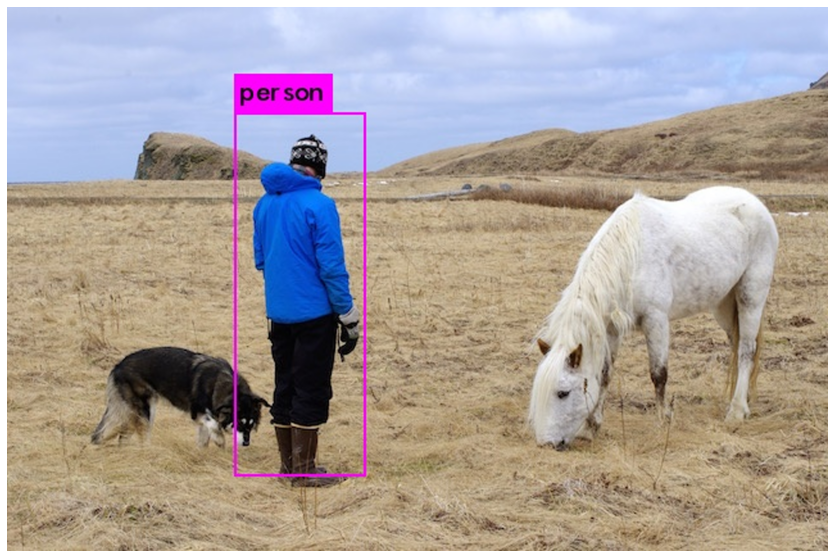

In [29]:
imShow('predictions.jpg')

In [31]:
!python extract_log.py

In [32]:
%ls

2007_test.txt   extract_log.py  LICENSE.mit       scripts/
2007_train.txt  get_anchors.py  LICENSE.v1        src/
2007_val.txt    include/        log.txt           training.log
2012_train.txt  libdarknet.a    Makefile          train.txt
2012_val.txt    libdarknet.so*  new_log_loss.txt  visualizeLog.py
anchor/         LICENSE         obj/              VOCdevkit/
cfg/            LICENSE.fuck    predictions.jpg   voc_label.py
darknet*        LICENSE.gen     python/           VOCtest_06-Nov-2007.tar
data/           LICENSE.gpl     README.md         VOCtrainval_06-Nov-2007.tar
examples/       LICENSE.meta    results/          VOCtrainval_11-May-2012.tar


In [53]:
!python visualizeLog.py

[]
Traceback (most recent call last):
  File "visualizeLog.py", line 40, in <module>
    tmp = (end_ite - start_ite - igore) / (x_num * 1.0)
ZeroDivisionError: float division by zero


In [34]:
%ls

2007_test.txt   extract_log.py  LICENSE.v1        training.log
2007_train.txt  get_anchors.py  log.txt           train.txt
2007_val.txt    include/        Makefile          visualizeLog.py
2012_train.txt  libdarknet.a    new_log_loss.txt  VOCdevkit/
2012_val.txt    libdarknet.so*  obj/              voc_label.py
anchor/         LICENSE         predictions.jpg   VOCtest_06-Nov-2007.tar
avg_loss.png    LICENSE.fuck    python/           VOCtrainval_06-Nov-2007.tar
cfg/            LICENSE.gen     README.md         VOCtrainval_11-May-2012.tar
darknet*        LICENSE.gpl     results/
data/           LICENSE.meta    scripts/
examples/       LICENSE.mit     src/


In [49]:
!python groundTruth.py

In [50]:
%ls

 2007_test.txt      include/           python/
 2007_train.txt     libdarknet.a       README.md
 2007_val.txt       libdarknet.so*     results/
 2012_train.txt     LICENSE            scripts/
 2012_val.txt       LICENSE.fuck       src/
 anchor/            LICENSE.gen        training.log
 avg_loss.png       LICENSE.gpl        train.txt
 cfg/               LICENSE.meta      'Untitled Folder'/
 darknet*           LICENSE.mit        visualizeLog.py
 data/              LICENSE.v1         VOCdevkit/
 examples/          log.txt            voc_label.py
 extract_log.py     Makefile           VOCtest_06-Nov-2007.tar
 get_anchors.py     new_log_loss.txt   VOCtrainval_06-Nov-2007.tar
 Ground_Truth.npy   obj/               VOCtrainval_11-May-2012.tar
 groundTruth.py     predictions.jpg


In [ ]:
!./darknet detector map cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights

In [ ]:
%ls

2007_test.txt            libdarknet.a     python/
2007_train.txt           libdarknet.so*   README.md
2007_val.txt             LICENSE          results/
2012_train.txt           LICENSE.fuck     scripts/
2012_val.txt             LICENSE.gen      src/
cfg/                     LICENSE.gpl      train.txt
darknet*                 LICENSE.meta     VOCdevkit/
data/                    LICENSE.mit      voc_label_difficult.py
difficult_2007_test.txt  LICENSE.v1       voc_label.py
difficult_2012_val.txt   Makefile         VOCtest_06-Nov-2007.tar
examples/                obj/             VOCtrainval_06-Nov-2007.tar
include/                 predictions.jpg  VOCtrainval_11-May-2012.tar


In [ ]:
!./darknet detector map cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights -dont_show -ext_output < /content/darknet/darknet/2007_test.txt > results/result.txt

In [ ]:
%ls

2007_test.txt            libdarknet.so*   results/
2007_train.txt           LICENSE          result.txt
2007_val.txt             LICENSE.fuck     scripts/
2012_train.txt           LICENSE.gen      src/
2012_val.txt             LICENSE.gpl      train.txt
cfg/                     LICENSE.meta     VOCdevkit/
darknet*                 LICENSE.mit      voc_label_difficult.py
data/                    LICENSE.v1       voc_label.py
difficult_2007_test.txt  Makefile         VOCtest_06-Nov-2007.tar
difficult_2012_val.txt   obj/             VOCtrainval_06-Nov-2007.tar
examples/                predictions.jpg  VOCtrainval_11-May-2012.tar
include/                 python/
libdarknet.a             README.md


In [ ]:
driveVideo = '/content/drive/MyDrive/PedestrianVideo/Pedestrians\ \(7\).MP4'
outputPath= '/content/drive/MyDrive/VideoResults/TinierCustomCfgVoc/resultPedestrians.avi'

In [ ]:
!cp -r /content/drive/MyDrive/PedestrianVideo/Pedestrians\ \(7\).MP4 ./inputVideo/

In [ ]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

!./darknet detector demo cfg/voc.data /content/darknet/darknet/cfg/tinier-yolo-bwn-3bit-relu-nomaxpool.cfg /content/drive/MyDrive/bckpTinierCustomCfgVoc/tinier-yolo-bwn-3bit-relu-nomaxpool_final.weights ./inputVideo/Pedestrians\ \(7\).MP4 -dont_show

Demo
layer     filters    size              input                output
    0 conv     16  3 x 3 / 2   416 x 416 x   3   ->   208 x 208 x  16
    1 conv     64  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  64
    2 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    3 conv     64  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x  64
    4 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    5 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128
    6 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    7 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256
    8 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
    9 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512
   10 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   11 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 conv    512  3 x 3 / 1    13 x  13 x 512   ->    13 x  13 x 512
   13 conv     30 

In [ ]:
!pip install torch



In [1]:
!pip3 install torch===1.3.1 torchvision===0.4.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 734.6 MB 14 kB/s 
     |████████████████████████████████| 10.2 MB 23.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.3.1 which is incompatible.


In [ ]:
from tool.darknet2pytorch import Darknet
WEIGHTS = Darknet(cfgfile)
WEIGHTS.load_weights(weightfile)

ModuleNotFoundError: ignored